# Scaling data 

## Objectives

- Understanding the effect of different scalers on the data.

- Using different scaler in sklearn.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm
import pandas as pd

In [3]:
df = pd.read_csv('../day-8-multiple-regression/data/Advertising.csv', index_col = 0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:
model = sm.OLS(df.Sales, sm.add_constant(df.drop(columns = 'Sales')))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        10:09:14   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# Question: which of these coefficients is most important? 
# Radio cuz of high coef. but it's false assumption because we don't know what the x values are. 

In [6]:
df = pd.read_csv('../day-8-multiple-regression/data/Advertising.csv', index_col = 0)
df['TV'] = df['TV']*1000

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
1,230100.0,37.8,69.2,22.1
2,44500.0,39.3,45.1,10.4
3,17200.0,45.9,69.3,9.3
4,151500.0,41.3,58.5,18.5
5,180800.0,10.8,58.4,12.9


In [8]:
model = sm.OLS(df.Sales, sm.add_constant(df.drop(columns = 'Sales')))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        10:12:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV          4.576e-05   1.39e-06     32.809      0.000     4.3e-05    4.85e-05
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                     4.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Without doing anything meaningful to the data, just by scaling TV, the coefficient has changed. 

In [13]:
np.random.seed(seed=43)
X = np.random.multivariate_normal(mean=(1, 1),
                                  cov=[[1, 0.7], [0.7, 1]],
                                  size=200)

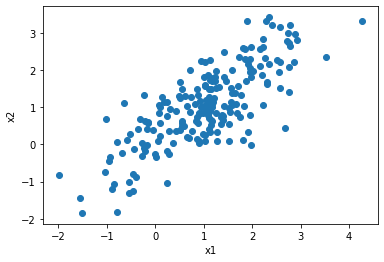

In [14]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Initial Distribitions of the Columns


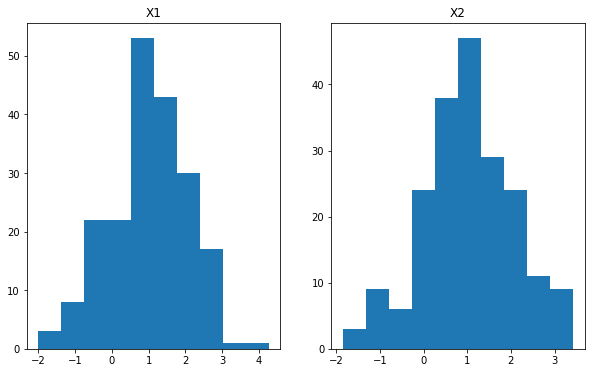

In [15]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('X1')
plt.hist(X[:, 0])

plt.subplot(1, 2, 2)
plt.title('X2')
plt.hist(X[:, 1])

plt.show()

## Scalers in Sklearn and their effect on the data

## Centralize

In [18]:
# take all my X and centralize them around 0.
X_centralized = X - X.mean()

X[:10]
X_centralized[:10]

array([[ 0.08021833, -0.62348837],
       [ 0.52181053,  0.10746669],
       [-0.66547047, -0.98538663],
       [-1.27217801,  0.28491563],
       [-1.02851765, -1.36873201],
       [ 0.1087314 ,  0.46142049],
       [ 1.83799126,  1.17022271],
       [-0.44061899, -0.53691173],
       [-1.57890971, -2.05795333],
       [ 1.27536125,  0.58626643]])

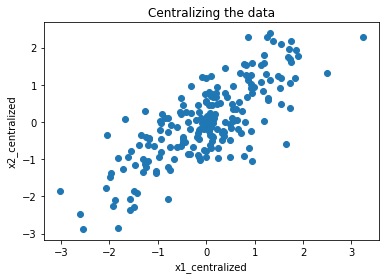

In [19]:
plt.scatter(X_centralized[:,0], X_centralized[:,1])

plt.title('Centralizing the data')

plt.xlabel('x1_centralized')
plt.ylabel('x2_centralized')

plt.show()

## StandardScaler

[Sklearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [23]:
# what the StandardScaler does:
(X_centralized/ X_centralized.std()).std()

0.9999999999999998

In [20]:
from sklearn.preprocessing import StandardScaler

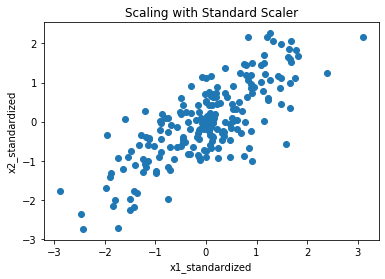

In [24]:
standard_scaler = StandardScaler()

X_std_scaled = standard_scaler.fit_transform(X)

plt.scatter(X_std_scaled[:, 0], X_std_scaled[:, 1])

plt.title('Scaling with Standard Scaler')

plt.xlabel('x1_standardized')
plt.ylabel('x2_standardized')

plt.show()

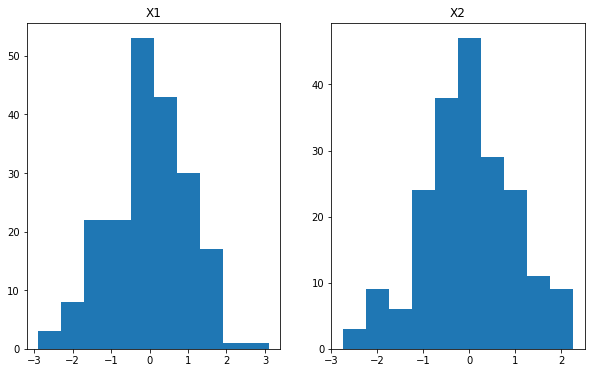

In [25]:
plt.figure(figsize= (10,6))
plt.subplot(1,2,1)
plt.title('X1')
plt.hist(X_std_scaled[:,0])

plt.subplot(1,2,2)
plt.title('X2')
plt.hist(X_std_scaled[:,1])

plt.show()

In [26]:
# let's investigate columns separately

X1_std_scaled_mean = round(X_std_scaled[:, 0].mean(), 4)

X1_std_scaled_std = round(X_std_scaled[:, 0].std(), 4)

print(f'Mean of X1 after standard scaling is {X1_std_scaled_mean:.4f}')
print(f'Std of X1 after standard scaling is {X1_std_scaled_std:.4f}')

Mean of X1 after standard scaling is 0.0000
Std of X1 after standard scaling is 1.0000


In [27]:
# let's investigate columns separately

X2_std_scaled_mean = round(X_std_scaled[:, 1].mean(), 4)

X2_std_scaled_std = round(X_std_scaled[:, 1].std(), 4)

print(f'Mean of X2 after standard scaling is {X2_std_scaled_mean:.4f}')
print(f'Std of X2 after standard scaling is {X2_std_scaled_std:.4f}')

Mean of X2 after standard scaling is -0.0000
Std of X2 after standard scaling is 1.0000


In [ ]:
# Let's do this with advertising data.

In [28]:
df.head()

,TV,Radio,Newspaper,Sales
1,230100.0,37.8,69.2,22.1
2,44500.0,39.3,45.1,10.4
3,17200.0,45.9,69.3,9.3
4,151500.0,41.3,58.5,18.5
5,180800.0,10.8,58.4,12.9


In [29]:
y = df.Sales
X = df.drop(columns = 'Sales')
X.head()

,TV,Radio,Newspaper
1,230100.0,37.8,69.2
2,44500.0,39.3,45.1
3,17200.0,45.9,69.3
4,151500.0,41.3,58.5
5,180800.0,10.8,58.4


In [30]:
X-X.mean()

,TV,Radio,Newspaper
1,83057.5,14.536,38.646
2,-102542.5,16.036,14.546
3,-129842.5,22.636,38.746
4,4457.5,18.036,27.946
5,33757.5,-12.464,27.846
...,...,...,...
196,-108842.5,-19.564,-16.754
197,-52842.5,-18.364,-22.454
198,29957.5,-13.964,-24.154
199,136557.5,18.736,35.646


In [31]:
(X-X.mean()).TV.mean()

0.0

In [32]:
# every mean is zero
(X-X.mean()).mean()

TV           0.000000e+00
Radio       -2.430944e-14
Newspaper    4.956036e-15
dtype: float64

In [34]:
X_std = (X-X.mean())/X.std()

In [35]:
model = sm.OLS(y, sm.add_constant(X_std))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        10:35:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0225      0.119    117.655      0.000      13.787      14.258
TV             3.9291      0.120     32.809      0.000       3.693       4.165
Radio          2.7991      0.128     21.893      0.000       2.547       3.051
Newspaper     -0.0226      0.128     -0.177      0.860      -0.275       0.230
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         1.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# here we see TV's impact is actually more important than radio

In [36]:
# this time with sklearn

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()


In [37]:
ss.fit(X)
X_ss  = ss.transform(X)
# same thing as 
X_ss = ss.fit_transform(X)

In [38]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [41]:
lm.fit(X_ss,y)
print(lm.coef_,lm.intercept_)

[ 3.91925365  2.79206274 -0.02253861] 14.022500000000003


In [58]:
ss.inverse_transform([.5,3,0])

array([1.89862166e+05, 6.76929369e+01, 3.05540000e+01])

Note that standard scaler does __not__ necessarily makes data __normal__

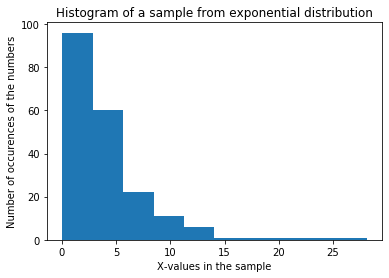

In [42]:
exponential_data = np.random.exponential(scale=4, size=200)

plt.hist(exponential_data)
plt.title('Histogram of a sample from exponential distribution')
plt.xlabel('X-values in the sample')
plt.ylabel('Number of occurences of the numbers')
plt.show()

In [43]:
# let's mean and std seperately

exponential_mean = round(exponential_data.mean(), 4)

exponential_std = round(exponential_data.std(), 4)

print(f'Mean of exponential_data is {exponential_mean:.4f}')
print(f'Std of exponential_data is {exponential_std:.4f}')

Mean of exponential_data is 4.0656
Std of exponential_data is 4.1547


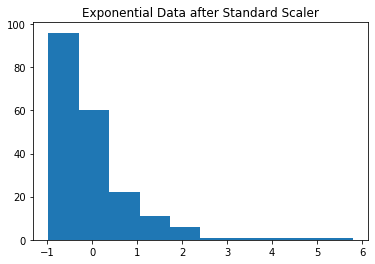

In [45]:
## After Standard Scaler
# now data is more skewed on the right hand side

std_scaled_exponential = standard_scaler.fit_transform(exponential_data.reshape(-1,1))

plt.hist(std_scaled_exponential)
plt.title('Exponential Data after Standard Scaler')

plt.show()

In [46]:
# let's mean and std seperately

std_exponential_mean = round(std_scaled_exponential.mean(), 4)

std_exponential_std = round(std_scaled_exponential.std(), 4)

print(f'Mean of exponential_data after scaling is {std_exponential_mean:.4f}')
print(f'Std of exponential_data after scaling is {std_exponential_std:.4f}')

Mean of exponential_data after scaling is 0.0000
Std of exponential_data after scaling is 1.0000


## MinMax Scaler


[Sklearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)

__Your Turn__

- Apply minmax scaler to the data and plot it.

- Check the mean and std of individual columns


In [47]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [48]:
np.random.seed(seed=43)
X = np.random.multivariate_normal(mean=(1, 1),
                                  cov=[[1, 0.7], [0.7, 1]],
                                  size=200)

In [49]:
X_minmax = mms.fit_transform(X)

In [52]:
X[:10]

array([[ 1.11454234,  0.41083565],
       [ 1.55613454,  1.1417907 ],
       [ 0.36885354,  0.04893739],
       [-0.237854  ,  1.31923964],
       [ 0.00580637, -0.334408  ],
       [ 1.14305541,  1.4957445 ],
       [ 2.87231528,  2.20454672],
       [ 0.59370502,  0.49741228],
       [-0.54458569, -1.02362931],
       [ 2.30968527,  1.62059045]])

In [51]:
X_minmax[:10]

array([[0.49637674, 0.42878688],
       [0.5668114 , 0.5671145 ],
       [0.37743819, 0.36030042],
       [0.28066736, 0.60069534],
       [0.31953158, 0.28775526],
       [0.50092462, 0.63409753],
       [0.77674433, 0.76823289],
       [0.41330236, 0.44517084],
       [0.23174317, 0.15732543],
       [0.68700395, 0.65772366]])

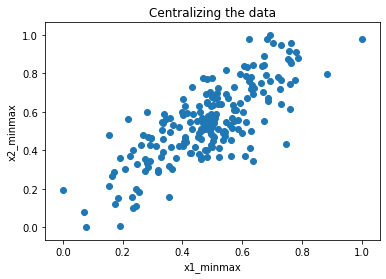

In [53]:
plt.scatter(X_minmax[:,0], X_minmax[:,1])

plt.title('Centralizing the data')

plt.xlabel('x1_minmax')
plt.ylabel('x2_minmax')

plt.show()

In [57]:
X_minmax.mean(axis = 0)

array([0.48249926, 0.54806164])

In [55]:
X_minmax.std(axis = 0)

array([0.16666838, 0.19918957])

## Bonus: Normalizer

[Sklearn Documentation](https://scikit-learn.org/stable/modules/preprocessing.html#normalization)

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
normalizer = Normalizer()

X_normalized = normalizer.fit_transform(X.T).T

In [ ]:
plt.scatter(X_normalized[:,0], X_normalized[:,1])

plt.title('Scaling with Normalizer')

plt.xlabel('X1_norm')
plt.ylabel('X2_norm')

plt.show()

In [ ]:
X_normalized[:,0].mean()

In [ ]:
X_normalized[:,0].std()